**Question-2 (Part A)**

The First Step here is to load and preprocess the MNIST data using TensorFlow.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


After successfully loading the data, I am normalizing the images by scaling them from 0-255 to 0-1. This helps in faster and efficient training.


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Next, I have reshaped the images into flat vector ones with 28x28=784 pixels to fit into an ANN.

In [ ]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

Next, I have split the data into our standard 80:20 split.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# priniting for my understanding
print("Training Set Shape:", x_train.shape, y_train.shape)
print("Validation Set Shape:", x_val.shape, y_val.shape)
print("Test Set Shape:", x_test.shape, y_test.shape)

Training Set Shape: (48000, 784) (48000,)
Validation Set Shape: (12000, 784) (12000,)
Test Set Shape: (10000, 784) (10000,)


The next step is to build the ANN model. So here I am creating a sequential model using the models.Sequential(). Then I have added two hidden layers with the ReLU activation function.

In [ ]:
from tensorflow.keras import layers, models, regularizers

Here I have used L2 regularization for preventing the overfitting issue and since it is a multi class problem with 10 classes I have used the softmax activation.

In [ ]:
# ANN model
model = models.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28*28,)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

Complied the model using adam optimizer, cross entropy less and the accuracy metric.

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Summary for my understanding
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In order to train the model I am using early stopping which will stop the training when the validation loss stops improving. So, here I monitor the val_less and have set the patience to 3 which means it will wait for 3 epochs before stopping and then it will restore the best weights if the overfitting starts.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8803 - loss: 0.7177 - val_accuracy: 0.9597 - val_loss: 0.3105
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9586 - loss: 0.2976 - val_accuracy: 0.9625 - val_loss: 0.2507
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9653 - loss: 0.2394 - val_accuracy: 0.9632 - val_loss: 0.2285
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9684 - loss: 0.2142 - val_accuracy: 0.9653 - val_loss: 0.2168
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9701 - loss: 0.1980 - val_accuracy: 0.9728 - val_loss: 0.1875
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.1810 - val_accuracy: 0.9660 - val_loss: 0.1990
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9723 - loss: 0.1766 - val_accuracy: 0.9707 - val_loss: 0.1823
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9749 - loss: 0

So here I trained for 100 epochs with the batch size of 32 and used patience level 3 so that there will be stable training. We also observe here that there is earlystopping occuring as it is preventing the model to overfit. And i have used validation loss to decide when to stop.

In [ ]:
# Evaluation on test set
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9649 - loss: 0.1943


In [ ]:
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9695
Test Loss: 0.1809


So here we have high test accuracy of around 96-97%. This also implies that the model is generalizing well to the new data also.

Now the next part is to define two digits for binary classification. Since my SJSU ID is 017526678, so the last two digits 7 and 8 will be taken as label 0 and label 1 respectively.

In [ ]:
digit_1 = 7  # Label 0
digit_2 = 8  # Label 1

In [ ]:
# Filtering the dataset to include only two digits
binary_train_idx = (y_train == digit_1) | (y_train == digit_2)
binary_val_idx = (y_val == digit_1) | (y_val == digit_2)
binary_test_idx = (y_test == digit_1) | (y_test == digit_2)

In [ ]:
x_train_binary, y_train_binary = x_train[binary_train_idx], y_train[binary_train_idx]
x_val_binary, y_val_binary = x_val[binary_val_idx], y_val[binary_val_idx]
x_test_binary, y_test_binary = x_test[binary_test_idx], y_test[binary_test_idx]

In [ ]:
# Converting the labels to binary (7 → 0, 8 → 1)
y_train_binary = np.where(y_train_binary == digit_1, 0, 1)
y_val_binary = np.where(y_val_binary == digit_1, 0, 1)
y_test_binary = np.where(y_test_binary == digit_1, 0, 1)

In [ ]:
print("Binary Training Set Shape:", x_train_binary.shape, y_train_binary.shape)
print("Binary Validation Set Shape:", x_val_binary.shape, y_val_binary.shape)
print("Binary Test Set Shape:", x_test_binary.shape, y_test_binary.shape)

Binary Training Set Shape: (9657, 784) (9657,)
Binary Validation Set Shape: (2459, 784) (2459,)
Binary Test Set Shape: (2002, 784) (2002,)


So here I have made sure that only 7 and 8 from MNIST data is filtered and then we have split into training and test set.

Next I will be creating a ANN model that is similar to the multi class model with two hidden layers. For this I will do the following:

*   Use sigmoid activation for the output layer
*   Then I will compile the model with binary cross-entropy loss and adam optimizer.

After this I will train the model by using early stopping.

In [ ]:
binary_model = models.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28*28,)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for output layer
])

In [ ]:
binary_model.compile(optimizer='adam',
                     loss='binary_crossentropy',  # Binary classification loss function
                     metrics=['accuracy'])


In [ ]:
# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
binary_history = binary_model.fit(
    x_train_binary, y_train_binary,
    epochs=100,
    batch_size=32,
    validation_data=(x_val_binary, y_val_binary),
    callbacks=[early_stopping]
)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9568 - loss: 0.3966 - val_accuracy: 0.9878 - val_loss: 0.1244
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9932 - loss: 0.0960 - val_accuracy: 0.9923 - val_loss: 0.0687
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0540 - val_accuracy: 0.9854 - val_loss: 0.0671
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9957 - loss: 0.0392 - val_accuracy: 0.9878 - val_loss: 0.0527
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9963 - loss: 0.0353 - val_accuracy: 0.9902 - val_loss: 0.0461
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0312 - val_accuracy: 0.9906 - val_loss: 0.0535
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0319 - val_accuracy: 0.9898 - val_loss: 0.0468
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9968 - loss: 0.0257 - val_accu

As this is done, now I will evaluate the model on the test set and then create a confusion matrix to see the predictions and then plot the learning curve which is training vs validation loss over epochs.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9921 - loss: 0.0384
Test Accuracy: 0.9940
Test Loss: 0.0325
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


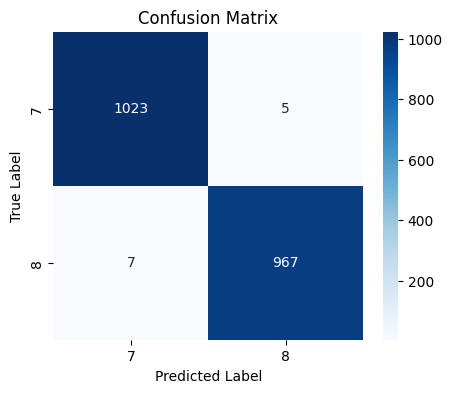

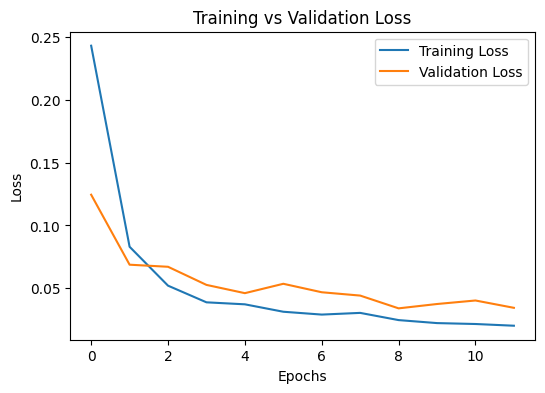

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test set
test_loss, test_acc = binary_model.evaluate(x_test_binary, y_test_binary)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generating predictions
y_pred = (binary_model.predict(x_test_binary) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[7, 8], yticklabels=[7, 8])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot Learning Curve (Training vs Validation Loss)
plt.figure(figsize=(6, 4))
plt.plot(binary_history.history['loss'], label="Training Loss")
plt.plot(binary_history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


Lastly, I have shown a few test samples for visualization with their predicted labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


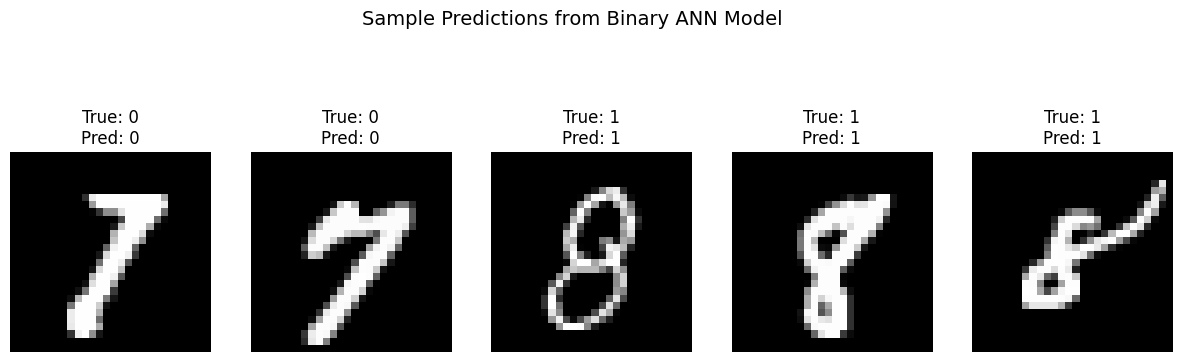

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

num_samples = 5
random_indices = random.sample(range(len(x_test_binary)), num_samples)

# Get the corresponding images and labels
sample_images = x_test_binary[random_indices].reshape(-1, 28, 28)
sample_labels = y_test_binary[random_indices]
sample_predictions = (binary_model.predict(x_test_binary[random_indices]) > 0.5).astype("int32")

# Plot the selected images with their true and predicted labels
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i], cmap="gray")
    ax.axis("off")
    ax.set_title(f"True: {sample_labels[i]}\nPred: {sample_predictions[i][0]}")
plt.suptitle("Sample Predictions from Binary ANN Model", fontsize=14)
plt.show()


**Question -2 (Part-B)**





In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Here I whave defined the combinations of the weight initializers and activation functions:

*   Weight Initializers: Normal, He, Xavier
*   Activation Functions: ReLU, Sigmoid, tanh



In [ ]:
# Combinations for initializers and activation functions
initializers_list = ['he_normal', 'glorot_normal', 'random_normal']  # He, Xavier, Normal
activation_functions = ['relu', 'sigmoid', 'tanh']

In [ ]:
results = []

Next I will be building the ANN model with all the combinations and then train the model and evaluate th eperformance.

In [ ]:
# Training the model
def build_and_train_model(initializer, activation):
    model = models.Sequential([
        layers.Dense(256, activation=activation, kernel_initializer=initializer, input_shape=(784,)),
        layers.Dense(128, activation=activation, kernel_initializer=initializer),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    # Early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(x_train_binary, y_train_binary,
                        epochs=100, batch_size=32,
                        validation_data=(x_val_binary, y_val_binary),
                        callbacks=[early_stopping], verbose=0)
    # Evaluation of the model on test data
    test_loss, test_acc = model.evaluate(x_test_binary, y_test_binary, verbose=0)

    # Generating predictions and confusion matrix
    y_pred = (model.predict(x_test_binary) > 0.5).astype("int32")
    conf_matrix = confusion_matrix(y_test_binary, y_pred)

    return test_acc, conf_matrix, history

In [ ]:
# Running experiments for all combinations
for initializer in initializers_list:
    for activation in activation_functions:
        test_acc, conf_matrix, history = build_and_train_model(initializer, activation)


        results.append({
            'Initializer': initializer,
            'Activation': activation,
            'Accuracy': test_acc,
            'Confusion Matrix': conf_matrix,
            'Training Loss': history.history['loss'],
            'Validation Loss': history.history['val_loss']
        })


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


For each model, I will generate:

*   Confusion Matrix
*   Learning Curve along with Accuracy table


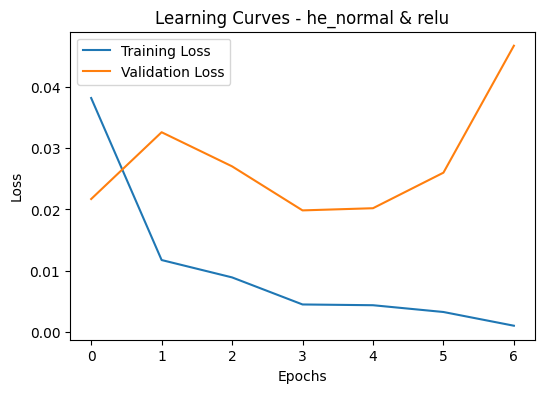

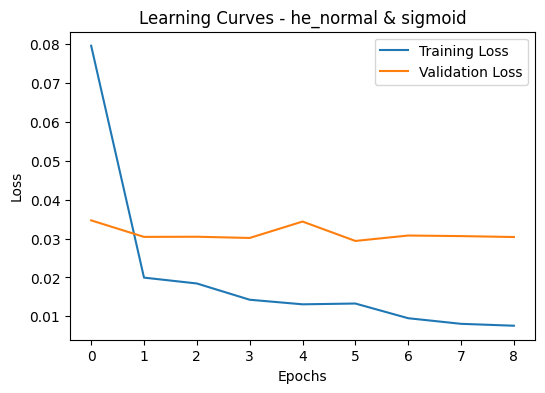

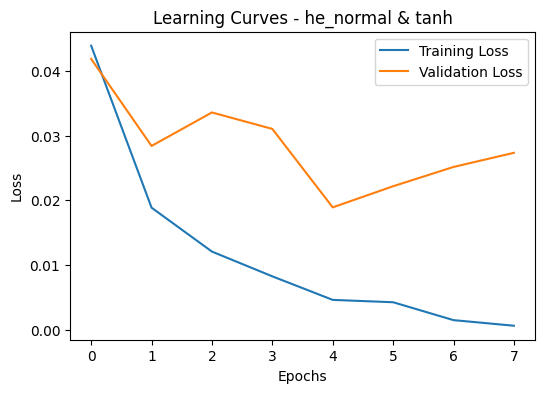

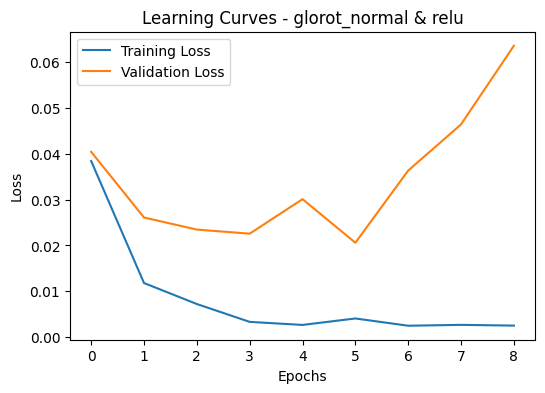

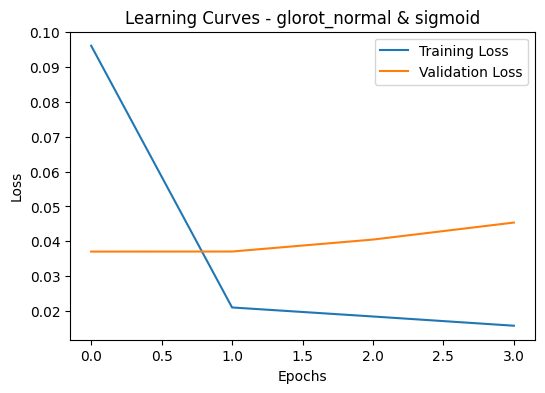

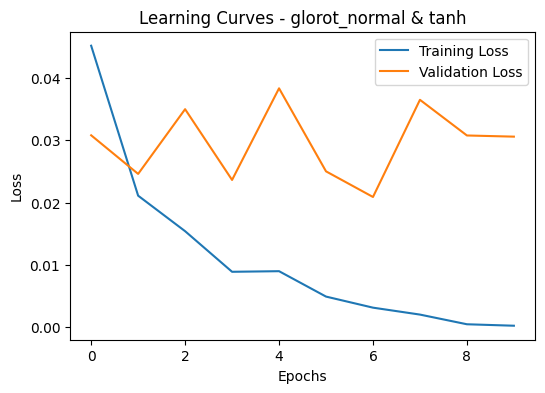

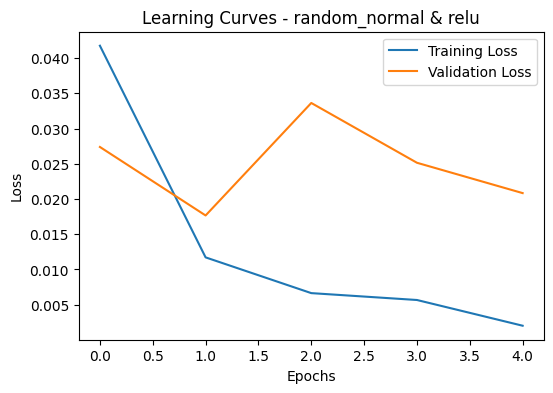

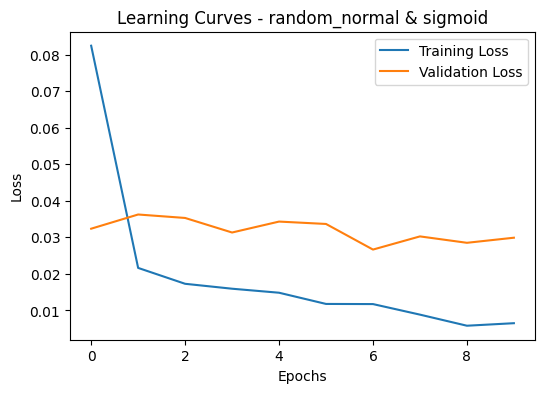

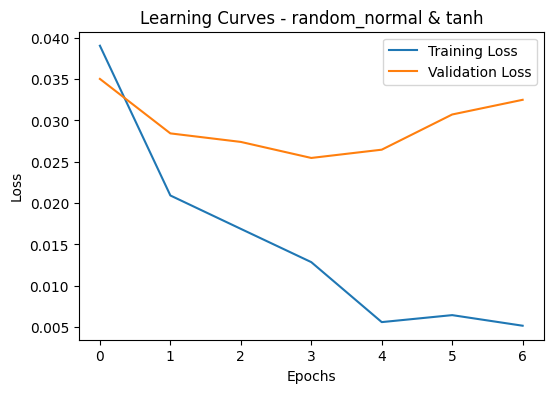

     Initializer Activation  Accuracy        Confusion Matrix  \
0      he_normal       relu  0.993506   [[1024, 4], [9, 965]]   
1      he_normal    sigmoid  0.991508   [[1020, 8], [9, 965]]   
2      he_normal       tanh  0.994505   [[1026, 2], [9, 965]]   
3  glorot_normal       relu  0.993506   [[1021, 7], [6, 968]]   
4  glorot_normal    sigmoid  0.986513  [[1008, 20], [7, 967]]   
5  glorot_normal       tanh  0.993007  [[1024, 4], [10, 964]]   
6  random_normal       relu  0.995005   [[1025, 3], [7, 967]]   
7  random_normal    sigmoid  0.992008  [[1023, 5], [11, 963]]   
8  random_normal       tanh  0.992508  [[1024, 4], [11, 963]]   

                                       Training Loss  \
0  [0.03819640353322029, 0.011742540635168552, 0....   
1  [0.07957658916711807, 0.019942527636885643, 0....   
2  [0.04387054964900017, 0.01885121501982212, 0.0...   
3  [0.03841928020119667, 0.011790432035923004, 0....   
4  [0.09616080671548843, 0.02098197303712368, 0.0...   
5  [0.0451810

In [ ]:
df_results = pd.DataFrame(results)

# Plot Learning Curves for each combination
for i, row in df_results.iterrows():
    plt.figure(figsize=(6, 4))
    plt.plot(row['Training Loss'], label="Training Loss")
    plt.plot(row['Validation Loss'], label="Validation Loss")
    plt.title(f"Learning Curves - {row['Initializer']} & {row['Activation']}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

print(df_results)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


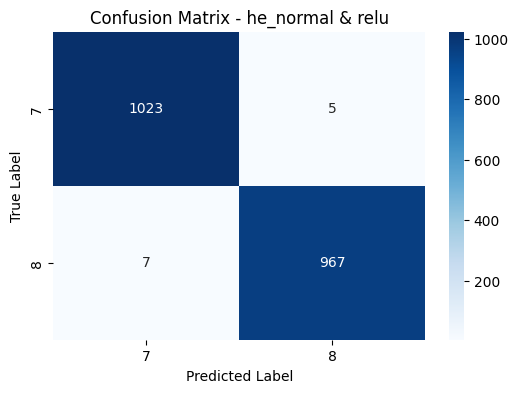

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


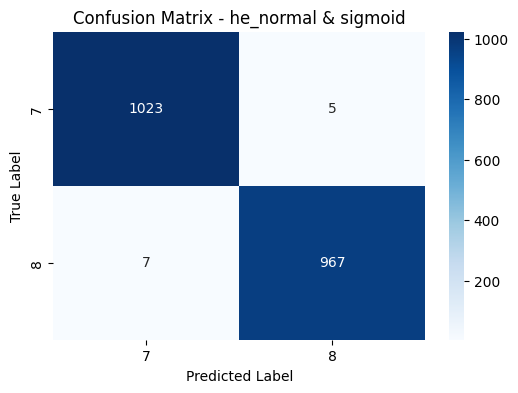

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


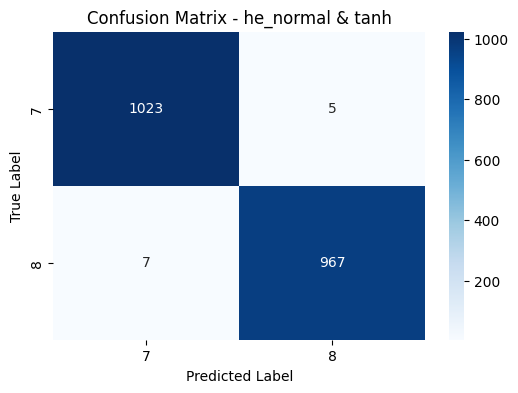

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


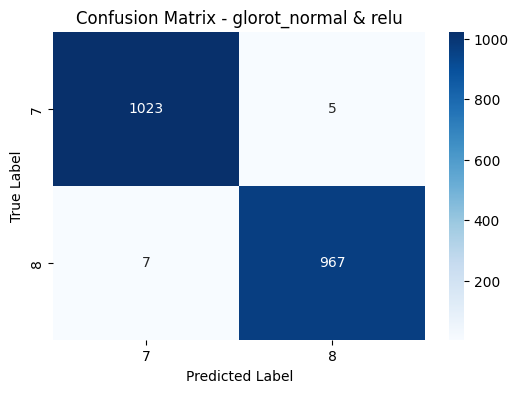

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


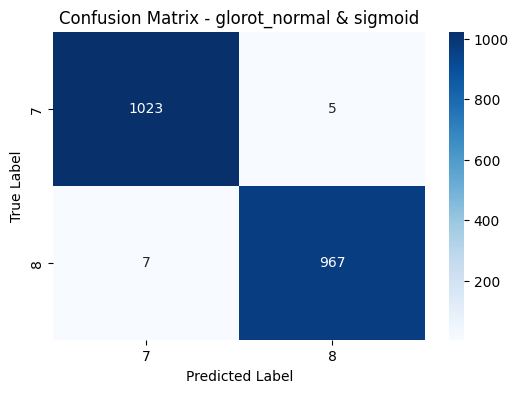

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


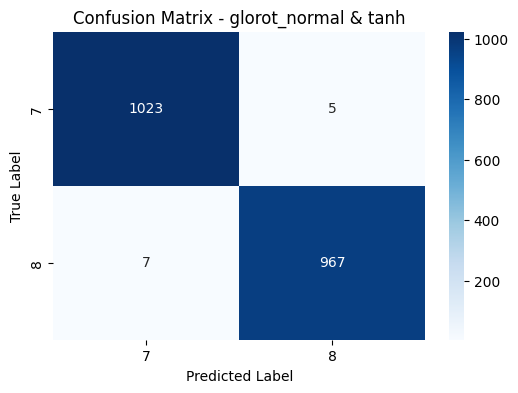

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


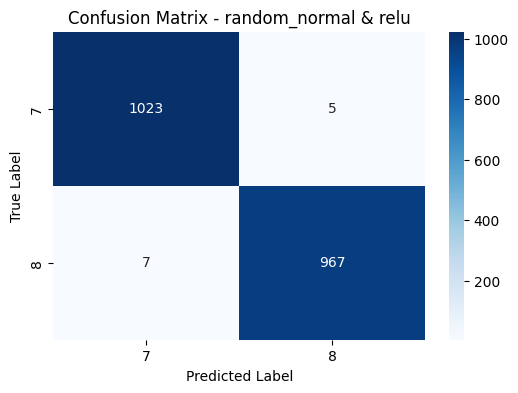

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


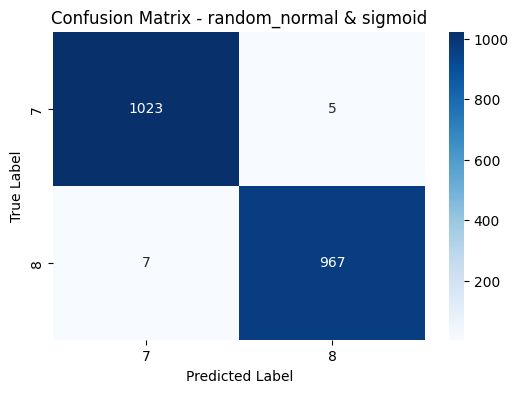

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


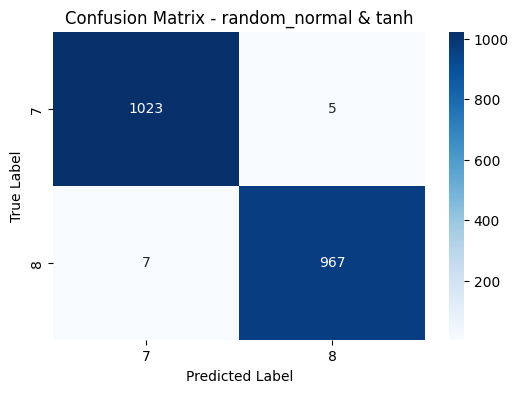

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Loop through each combination and plot confusion matrix
for i, row in df_results.iterrows():
    # Generate predictions for the test set
    y_pred_full = (binary_model.predict(x_test_binary) > 0.5).astype("int32")

    # Generate confusion matrix for the test set
    conf_matrix = confusion_matrix(y_test_binary, y_pred_full)

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[7, 8], yticklabels=[7, 8])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {row['Initializer']} & {row['Activation']}")
    plt.show()


**Comparative Analysis**


Question 3

Here first I have to build a ANN model for multi class classification by using the same MNIST dataset. So, the plan here is to load the dataset and then normalize the pixel values and reshape the images. Then after splitting the dataset, will build an ANN with two hidden layers. Next, to prevent overfitting I applied early stopping.And then trained model for 100 epochs, evaluated the model and lastly generated classsification report.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Preprocessing the data by normalizing pixel values (scale from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Reshape data for ANN (from 28x28 to a flat vector of 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [ ]:
# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# ANN model
model = models.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28*28,)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')  # Output layer for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Training with 100 epochs
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8746 - loss: 0.7263 - val_accuracy: 0.9578 - val_loss: 0.3109
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9584 - loss: 0.2927 - val_accuracy: 0.9612 - val_loss: 0.2593
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9656 - loss: 0.2400 - val_accuracy: 0.9656 - val_loss: 0.2298
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9692 - loss: 0.2139 - val_accuracy: 0.9663 - val_loss: 0.2150
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9709 - loss: 0.1945 - val_accuracy: 0.9693 - val_loss: 0.1952
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.1741 - val_accuracy: 0.9651 - val_loss: 0.2036
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9741 - loss: 0.1727 - val_accuracy: 0.9697 - val_loss: 0.1891
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9759 - loss: 

In [ ]:
# Testing on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1880

Test Accuracy: 0.9693


In [ ]:
# Generating predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0     0.9577    0.9939    0.9755       980
           1     0.9868    0.9885    0.9877      1135
           2     0.9890    0.9574    0.9729      1032
           3     0.9582    0.9762    0.9671      1010
           4     0.9851    0.9409    0.9625       982
           5     0.9764    0.9720    0.9742       892
           6     0.9810    0.9697    0.9753       958
           7     0.9751    0.9533    0.9641      1028
           8     0.9699    0.9600    0.9649       974
           9     0.9182    0.9792    0.9477      1009

    accuracy                         0.9693     10000
   macro avg     0.9697    0.9691    0.9692     10000
weighted avg     0.9699    0.9693    0.9693     10000



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

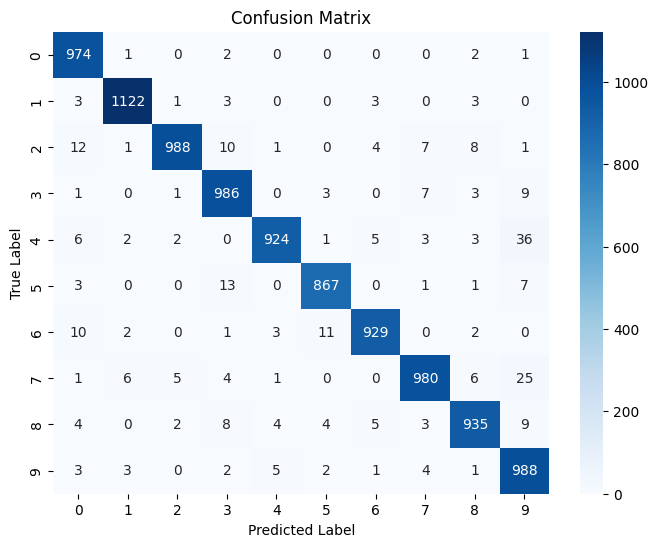

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

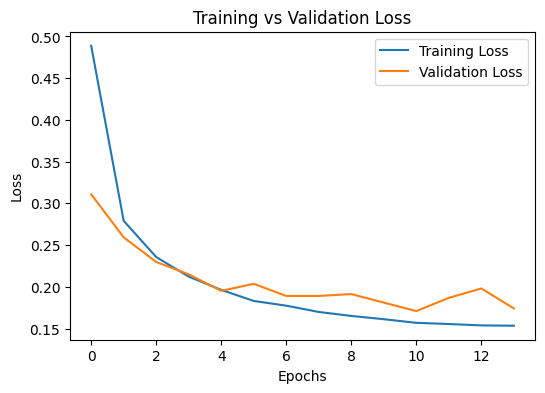

In [ ]:
# Plot Learning Curve (Training vs Validation Loss)
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

QUESTION-4

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, initializers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

In [10]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocessing Steps
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Splitting data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:
# ANN model building for binary classification
def build_binary_ann(initializer='glorot_uniform', activation='relu'):
    model = models.Sequential([
        layers.Dense(128, activation=activation, kernel_initializer=initializer, input_shape=(28*28,)),
        layers.Dense(64, activation=activation, kernel_initializer=initializer),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# Multi-Class Classification ANN
def build_multiclass_ann():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(28*28,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
# Multi-Class Classification with Batch Sizes and Learning Rates
batch_sizes = [4, 16, 32, 64]
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
results = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        print(f"Training with batch_size={batch_size}, learning_rate={lr}")
        optimizer = keras.optimizers.Adam(learning_rate=lr)
        model = build_multiclass_ann()
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=batch_size,callbacks=[early_stopping], verbose=1)
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        ratio = batch_size / lr
        results.append({'Batch Size': batch_size, 'Learning Rate': lr, 'Accuracy': test_acc, 'Ratio': ratio})



Training with batch_size=4, learning_rate=0.01
Epoch 1/100
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7916 - loss: 0.7585 - val_accuracy: 0.9103 - val_loss: 0.4635
Epoch 2/100
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8972 - loss: 0.4473 - val_accuracy: 0.9143 - val_loss: 0.3593
Epoch 3/100
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8979 - loss: 0.4694 - val_accuracy: 0.9134 - val_loss: 0.4158
Epoch 4/100
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9124 - loss: 0.4135 - val_accuracy: 0.9035 - val_loss: 0.6559
Epoch 5/100
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9040 - loss: 0.4837 - val_accuracy: 0.9224 - val_loss: 0.5543
Training with batch_size=4, learning_rate=0.001
Epoch 1/100
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8836 - loss: 0.3721 - val_accuracy: 0.9632 - val_loss: 0.1354
Epoch 2/100
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9654 - loss: 0.1214 - val_acc

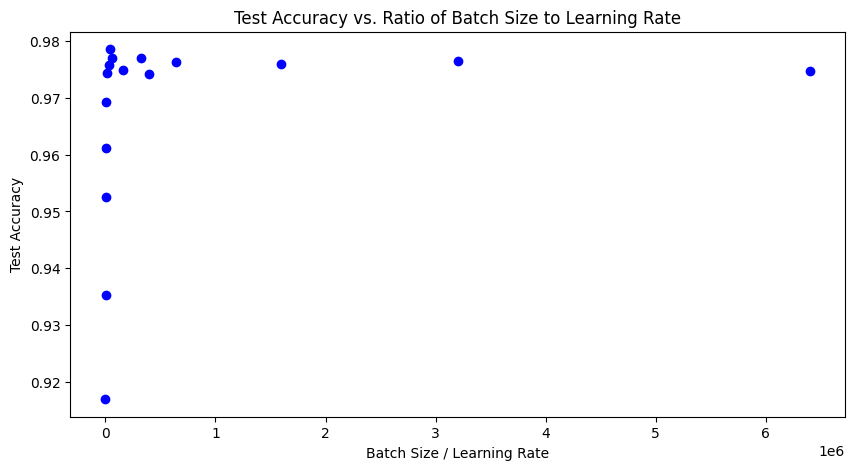

    Batch Size  Learning Rate  Accuracy      Ratio
0            4        0.01000    0.9170      400.0
1            4        0.00100    0.9692     4000.0
2            4        0.00010    0.9785    40000.0
3            4        0.00001    0.9741   400000.0
4           16        0.01000    0.9354     1600.0
5           16        0.00100    0.9743    16000.0
6           16        0.00010    0.9748   160000.0
7           16        0.00001    0.9759  1600000.0
8           32        0.01000    0.9525     3200.0
9           32        0.00100    0.9757    32000.0
10          32        0.00010    0.9769   320000.0
11          32        0.00001    0.9765  3200000.0
12          64        0.01000    0.9612     6400.0
13          64        0.00100    0.9770    64000.0
14          64        0.00010    0.9763   640000.0
15          64        0.00001    0.9746  6400000.0


In [8]:
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
plt.scatter(results_df['Ratio'], results_df['Accuracy'], c='blue')
plt.xlabel('Batch Size / Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Ratio of Batch Size to Learning Rate')
plt.show()

print(results_df)